In [59]:
import numpy as np
import gzip

In [60]:
def read_int(f):
    return int.from_bytes(f.read(4), 'big')

def read_images(path, type='train'):
    file_name = type + '-images-idx3-ubyte.gz'
    with gzip.open(path + file_name, 'r') as f:
        f.read(4)
        images_cnt = read_int(f)
        rows = read_int(f)
        columns = read_int(f)
        image_bytes = f.read()

        return np.frombuffer(image_bytes, dtype=np.uint8).reshape((images_cnt, rows, columns, 1)).astype(float)

def read_labels(path, type='train'):
    file_name = type + '-labels-idx1-ubyte.gz'
    with gzip.open(path + file_name, 'r') as f:
        f.read(8)
        label_bytes = f.read()
        return np.frombuffer(label_bytes, dtype=np.uint8)

In [61]:
train_mnist_images = read_images("data/mnist/")
train_mnist_labels = read_labels("data/mnist/")
test_mnist_images = read_images(path="data/mnist/", type='t10k')
test_mnist_labels = read_labels(path="data/mnist/", type='t10k')

train_fashion_images = read_images(path="data/fashion/")
train_fashion_labels = read_labels(path="data/fashion/")
test_fashion_images = read_images(path="data/fashion/", type='t10k')
test_fashion_labels = read_labels(path="data/fashion/", type='t10k')

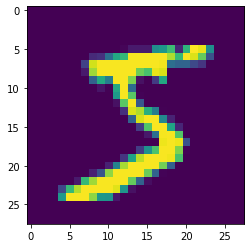

5


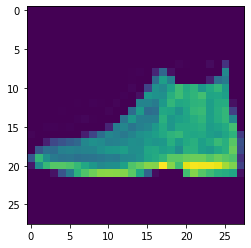

9


In [62]:
import matplotlib.pyplot as plt

def print_image(data):
    plt.imshow(data.squeeze())

print_image(train_mnist_images[0])
plt.show()
print(train_mnist_labels[0])

print_image(test_fashion_images[0])
plt.show()
print(test_fashion_labels[0])

In [63]:
def normalize(dataset):
    dataset /= 255

normalize(train_mnist_images)
normalize(test_mnist_images)
normalize(train_fashion_images)
normalize(test_fashion_images)

In [64]:
train_mnist_images[0].shape

(28, 28, 1)

In [65]:
from tensorflow import keras

batch_size = 128

def fit_and_evaluate(model,
                     train_images=train_mnist_images,
                     train_labels=train_mnist_labels,
                     test_images=test_mnist_images,
                     test_labels=test_mnist_labels
                     ):
    model.compile(optimizer='adam',
                loss=keras.losses.sparse_categorical_crossentropy,
                metrics=['accuracy']
                )
    model.fit(train_images, train_labels, batch_size=batch_size, epochs=5, validation_split=0.1)
    return model.evaluate(test_images, test_labels, verbose=0)

In [66]:
lenet_5 = keras.Sequential([
    keras.layers.Conv2D(6, kernel_size=5,
                        activation='relu',
                        padding='same',
                        input_shape=train_mnist_images[0].shape
                        ),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(16, kernel_size=5,
                        activation='relu'
                        ),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(120, kernel_size=5,
                    activation='relu'
                    ),
    keras.layers.Flatten(),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [67]:
# 28 x 28 => 16 x 28 x 28 => 16 x 14 x 14 => 32 x 12 x 12 => 32 x 6 x 6
# => 64 x 2 x 2 => 64 x 1 x 1 => 64 => 10

first_model = keras.Sequential([
    keras.layers.Conv2D(16, kernel_size=3,
                    activation='relu',
                    padding='same',
                    input_shape=train_mnist_images[0].shape
                    ),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, kernel_size=3,
                    activation='relu'
                    ),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, kernel_size=5,
                activation='relu'
                ),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

In [68]:
# 28 x 28 => 16 x 24 x 24 => 16 x 8 x 8 => 64 x 8 x 8 => 64 x 4 x 4
# => 128 x 2 x 2 => 128 x 1 x 1 => 128 => 10

second_model = keras.Sequential([
    keras.layers.Conv2D(16, kernel_size=5,
                    activation='relu',
                    input_shape=train_mnist_images[0].shape
                    ),
    keras.layers.MaxPooling2D((3, 3)),
    keras.layers.Conv2D(64, kernel_size=3,
                        activation='relu',
                        padding='same'
                        ),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, kernel_size=3,
                    activation='relu'
                    ),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])


In [69]:
scores = []

name_to_model = {
    "lenet_5": lenet_5,
    "first_model": first_model,
    "second_model": second_model
}

for name in ("lenet_5", "first_model", "second_model"):
    print(name)
    print()
    model = name_to_model[name]
    curr_score = fit_and_evaluate(model)
    scores.append((curr_score[1], name))
    print(curr_score)

lenet_5

Epoch 1/5
  4/422 [..............................] - ETA: 9s - loss: 2.2778 - accuracy: 0.2441  

2022-05-17 15:42:50.519125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - ETA: 0s - loss: 0.3522 - accuracy: 0.8926

2022-05-17 15:42:56.347113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - 6s 14ms/step - loss: 0.3522 - accuracy: 0.8926 - val_loss: 0.1089 - val_accuracy: 0.9680
Epoch 2/5
422/422 [==============================] - 6s 14ms/step - loss: 0.1005 - accuracy: 0.9696 - val_loss: 0.0756 - val_accuracy: 0.9788

2022-05-17 15:43:21.705611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


421/422 [============================>.] - ETA: 0s - loss: 0.2916 - accuracy: 0.9162  

2022-05-17 15:43:27.279725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - 6s 14ms/step - loss: 0.2914 - accuracy: 0.9162 - val_loss: 0.0850 - val_accuracy: 0.9745
Epoch 2/5
422/422 [==============================] - 6s 13ms/step - loss: 0.0698 - accuracy: 0.9791 - val_loss: 0.0547 - val_accuracy: 0.9840

2022-05-17 15:43:51.327071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


421/422 [============================>.] - ETA: 0s - loss: 0.3108 - accuracy: 0.9083

2022-05-17 15:43:56.680794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - 6s 13ms/step - loss: 0.3103 - accuracy: 0.9084 - val_loss: 0.0750 - val_accuracy: 0.9793
Epoch 2/5
422/422 [==============================] - 5s 12ms/step - loss: 0.0757 - accuracy: 0.9773 - val_loss: 0.0815 - val_accuracy: 0.9767

In [70]:
print(scores)
scores.sort(key=lambda x: x[0], reverse=True)

print(scores[0])

best_model = name_to_model[scores[0][1]]

[(0.9863000512123108, 'lenet_5'), (0.9875000715255737, 'first_model'), (0.9885000586509705, 'second_model')]
(0.9885000586509705, 'second_model')


In [71]:
best_model.fit(train_fashion_images, train_fashion_labels, batch_size=batch_size, epochs=5, validation_split=0.1)
predictions = best_model.predict(test_fashion_images)

Epoch 1/5
422/422 [==============================] - 5s 13ms/step - loss: 0.5451 - accuracy: 0.8075 - val_loss: 0.4273 - val_accuracy: 0.8445

2022-05-17 15:44:46.554382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [72]:
metrics = keras.metrics.Accuracy()
metrics.update_state(y_true=test_fashion_labels, y_pred=predictions.argmax(axis=1))
print(metrics.result().numpy())

0.88860005


In [73]:
CLASSES = 10

confusion_matrix = [[0] * CLASSES for i in range(10)]

for i in range(len(test_fashion_labels)):
    pred = predictions[i].argmax(axis=0)
    confusion_matrix[test_fashion_labels[i]][pred] += 1

for i in range(CLASSES):
    print(confusion_matrix[i])

[884, 0, 9, 11, 0, 3, 78, 1, 14, 0]
[3, 971, 0, 18, 2, 0, 3, 0, 3, 0]
[25, 1, 803, 7, 59, 0, 93, 0, 12, 0]
[27, 2, 8, 901, 13, 0, 42, 0, 6, 1]
[1, 1, 82, 48, 751, 0, 109, 0, 8, 0]
[0, 0, 0, 0, 0, 976, 0, 18, 0, 6]
[168, 0, 51, 19, 48, 0, 696, 0, 18, 0]
[0, 0, 0, 0, 0, 11, 0, 975, 0, 14]
[2, 0, 1, 2, 0, 3, 2, 6, 983, 1]
[0, 0, 1, 0, 0, 6, 0, 47, 0, 946]


In [74]:
images_confusion_matrix = [[0] * CLASSES for i in range(CLASSES)]
probabilities = [[0] * CLASSES for i in range(CLASSES)]

for i in range(len(test_fashion_labels)):
    label = test_fashion_labels[i]
    for j in range(CLASSES):
        if predictions[i][j] > probabilities[label][j]:
            probabilities[label][j] = predictions[i][j]
            images_confusion_matrix[label][j] = test_fashion_images[i]


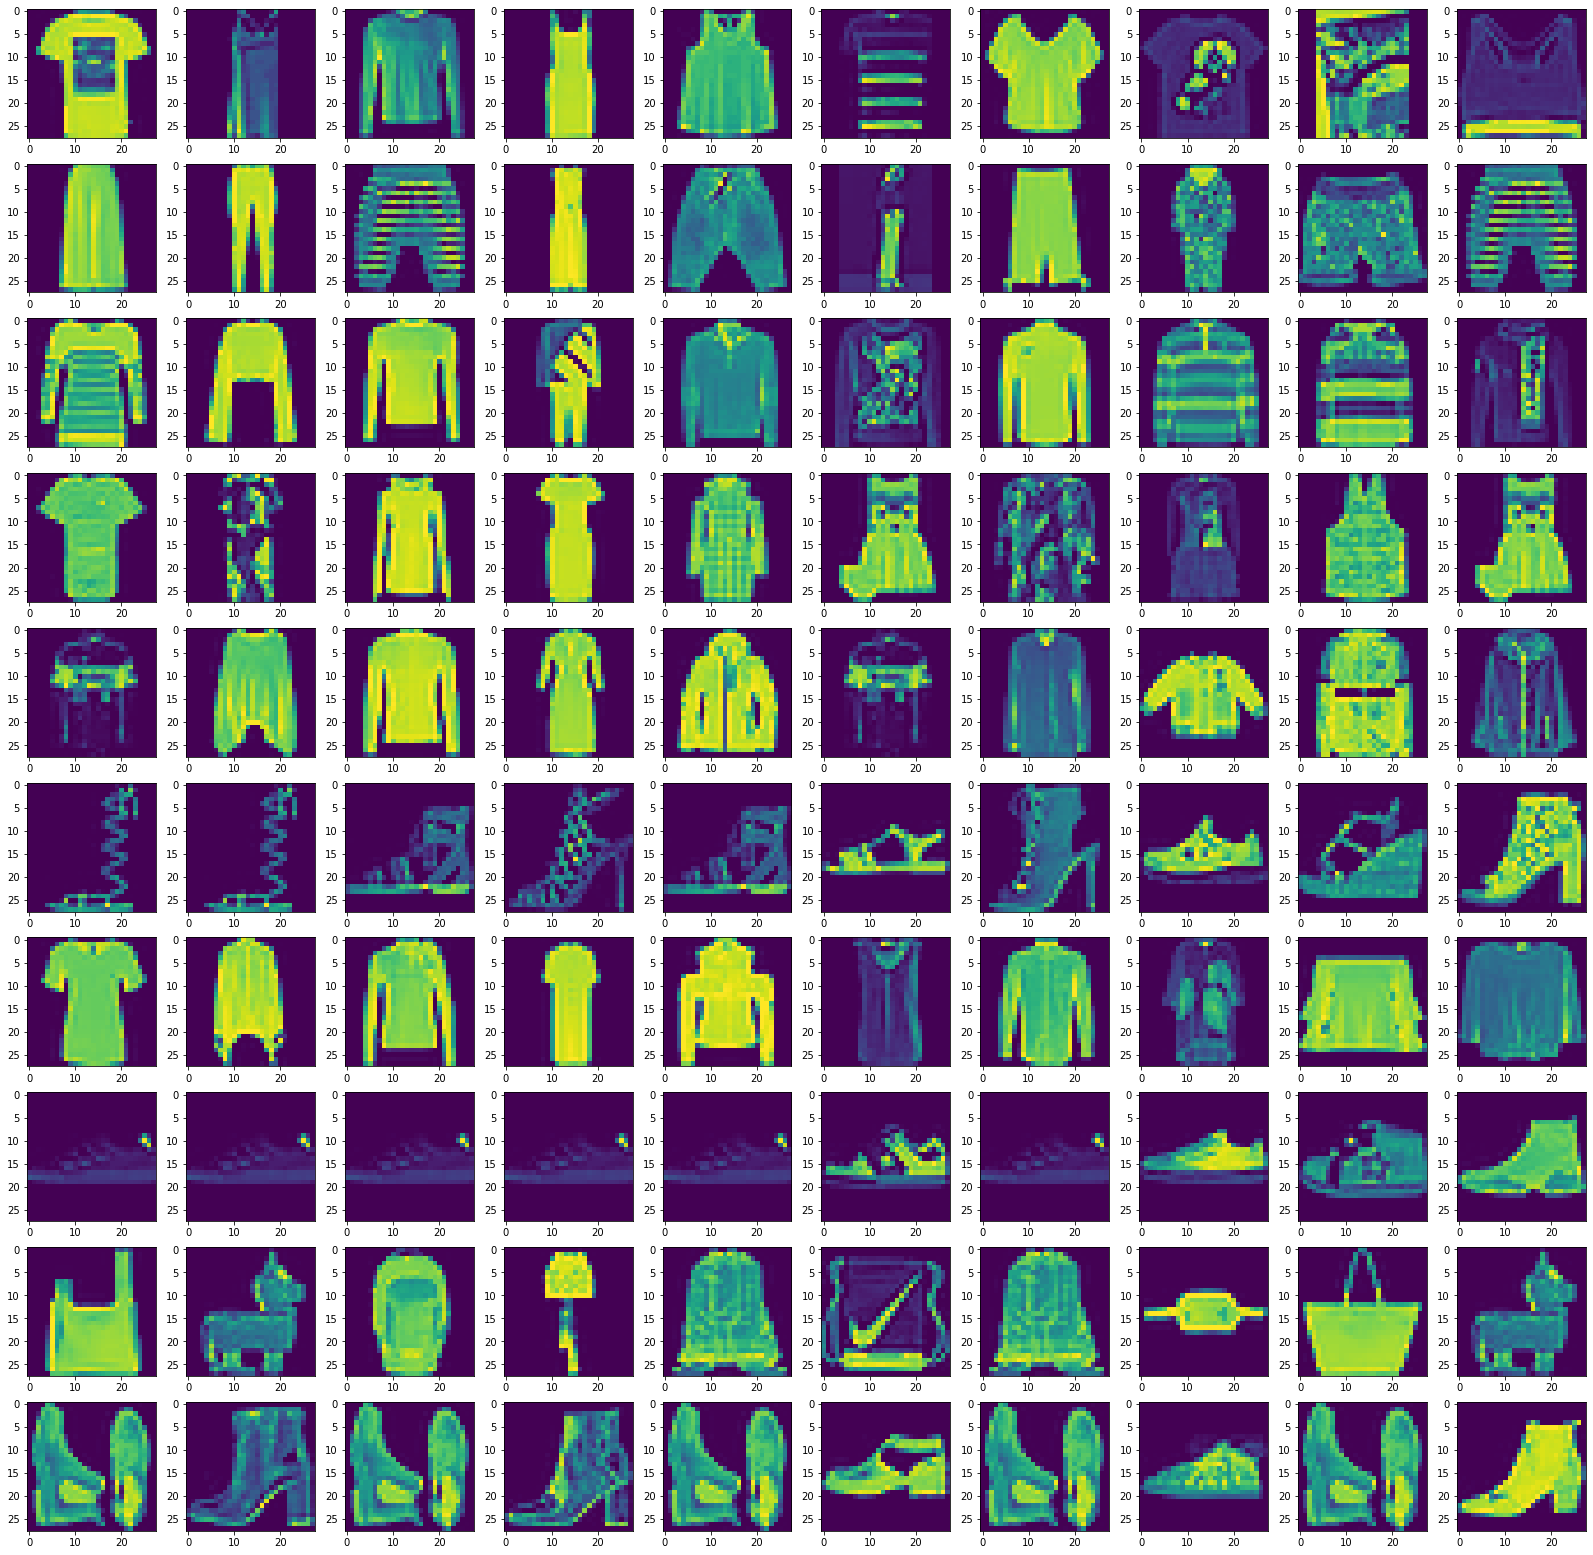

In [75]:
fig, axes = plt.subplots(nrows=CLASSES, ncols=CLASSES, figsize=(28,28))

for i in range(CLASSES):
    for j in range(CLASSES):
        axes[i, j].imshow(images_confusion_matrix[i][j].squeeze())
